# Background EDA
Use our dataset to explore trends/correlations found in other studies regarding public health

In [1]:
## Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
## Load data
df_qnt = pd.read_csv('data/data_detrend.csv', index_col='CountySt')
df_nn = pd.read_csv('data/data_not_normalized.csv', index_col='CountySt')

## Convert dummy vars to character
dummy_vars = ['METRO13', 'has_recfac']
chr_df_nn = df_nn.copy()
chr_df_qnt = df_qnt.copy()
for dv in dummy_vars:
    chr_df_nn[dv] = ['Yes' if x==1 else 'No' for x in chr_df_nn[dv]]
    chr_df_qnt[dv] = ['Yes' if x==1 else 'No' for x in chr_df_qnt[dv]]

## How Healthy Is Your County?
https://pmc.ncbi.nlm.nih.gov/articles/PMC2935645/#:~:text=Each%20county%20is%20rated%20on,of%20children%20living%20in%20poverty.

1. "80% of the counties with populations in poorest health were rural" 

Trapp D.Health status varies by county: Where patients live matters American Medical News March12010. Available at: www.ama-assn.org/amednews/2010/03/01/gvl10201.htm Accessed June 30, 2010.

2. Conversely, people who live in the healthier-ranked counties tend to have higher education levels, are more likely to be employed; and have access to more health care providers, healthful foods, parks, and recreational facilities.

### Question 1: Do rural counties have worse health? Do urban or rural counties tend to have larger populations?
Answer: Rural counties seem to have slightly worse health (higher rates of heart disease and diabetes) and smaller populations.

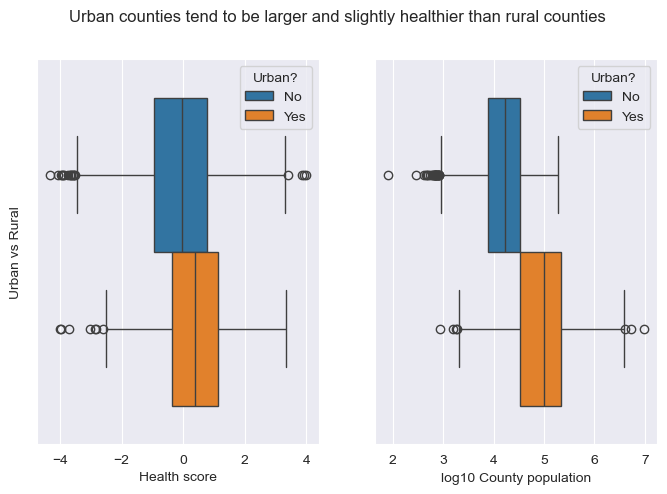

In [3]:
fig, axs = plt.subplots(1,2, figsize=(8,5))
sns.boxplot(data=chr_df_nn, x='PCA', hue='METRO13', ax=axs[0])
sns.boxplot(data=chr_df_nn, x=np.log10(chr_df_nn['2010_Census_Population']), hue='METRO13', ax=axs[1])
axs[0].set_ylabel('Urban vs Rural')
axs[0].set_xlabel('Health score')
axs[1].set_xlabel('log10 County population')
axs[0].legend(title='Urban?')
axs[1].legend(title='Urban?')
plt.suptitle('Urban counties tend to be larger and slightly healthier than rural counties')
plt.savefig('data/figures/urban vs rural.png')
plt.show()

### Question 2: Do healthier counties have greater access to healthful foods and recreational facilities?
Answer: Healthier counties tend to have more farms, recreational facilities, and a higher ratio of full service : fast food restaurants. However, the greatest trend appears to be with the ratio between healthy stores (grocery, specialty, and supercenters) : unhealthy stores (convenience).

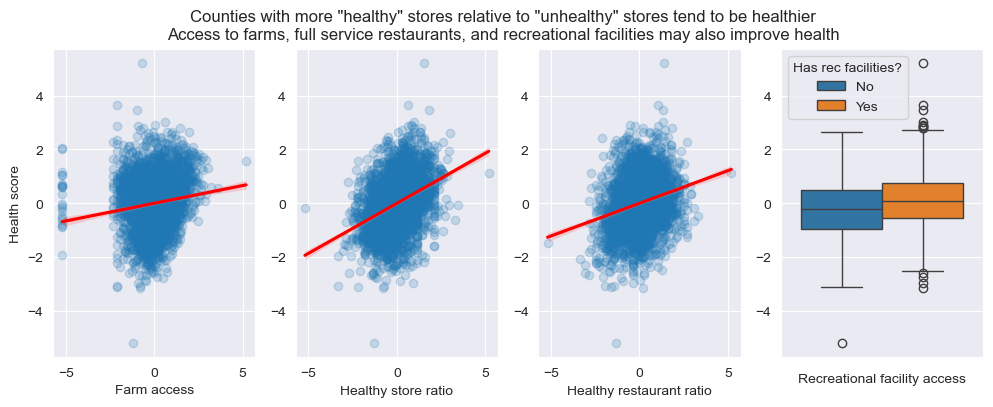

In [4]:
# plot food vs health
fig, axs = plt.subplots(1,4, figsize=(12,4))
sns.regplot(data=chr_df_qnt, x='sum_farms', y='PCA', ax=axs[0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[0].set_ylabel('Health score')
axs[0].set_xlabel('Farm access')
sns.regplot(data=chr_df_qnt, x='healthy_store_ratio', y='PCA', ax=axs[1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[1].set_ylabel('')
axs[1].set_xlabel('Healthy store ratio')
sns.regplot(data=chr_df_qnt, x='healthy_restaurant_ratio', y='PCA', ax=axs[2], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[2].set_ylabel('')
axs[2].set_xlabel('Healthy restaurant ratio')
sns.boxplot(data=chr_df_qnt, hue='has_recfac', y='PCA', orient='v', ax=axs[3])
axs[3].set_ylabel('')
axs[3].set_xlabel('Recreational facility access')
axs[3].legend(title='Has rec facilities?')
plt.suptitle('Counties with more "healthy" stores relative to "unhealthy" stores tend to be healthier\nAccess to farms, full service restaurants, and recreational facilities may also improve health')
plt.savefig('data/figures/healthy food access.png')
plt.show()

### Question 3: Are wealthier counties healthier?
Answer: Counties with high median household income and low poverty rates tend to be healthiest.


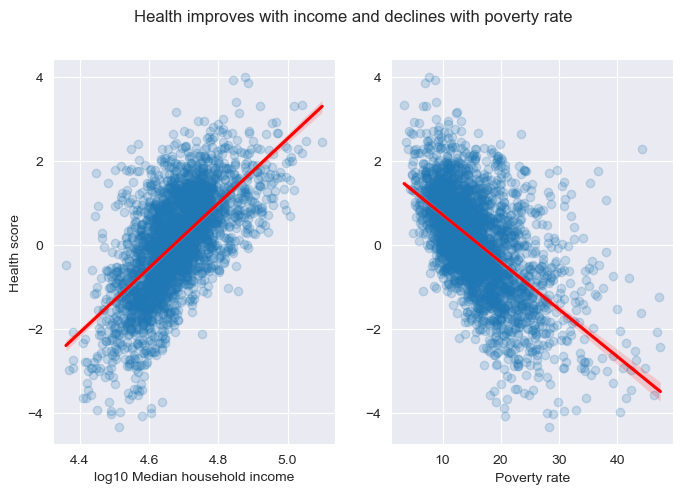

In [5]:
fig, axs = plt.subplots(1,2, figsize=(8,5))
sns.regplot(data=df_nn, x=np.log10(df_nn['MEDHHINC15']), y='PCA', ax=axs[0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[0].set_ylabel('Health score')
axs[0].set_xlabel('log10 Median household income')
sns.regplot(data=df_nn, x='POVRATE15', y='PCA', ax=axs[1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[1].set_ylabel('')
axs[1].set_xlabel('Poverty rate')
plt.suptitle('Health improves with income and declines with poverty rate')
plt.savefig('data/figures/health vs income.png')
plt.show()

## Health, Income, and Race
Is there a relationship between the percentage of white, black, and Hispanic populations in a county and county health or income?
### Income
Counties with large white populations tend to be wealthier and counties with large black populations tend to be less wealthy.

Counties with intermediate Hispanic populations may be wealthier as well.
### Health
Higher income in predominately white counties may not translate to improved health.

Predominately black counties seem to have greater risk of heart disease and diabetes, whereas predominately Hispanic counties have lower risk.

I'm curious what lifestyle, social, or other mortality factors could explain these trends.

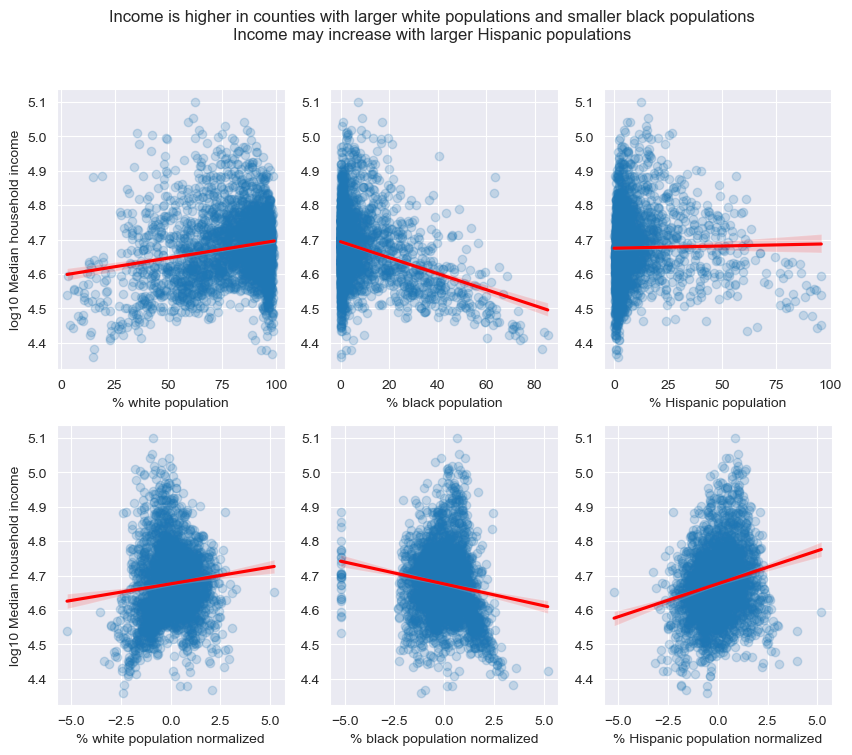

In [6]:
# Income vs race
fig, axs = plt.subplots(2,3, figsize=(10,8))
for i,(d,norm) in enumerate([(df_nn, ''), (df_qnt, ' normalized')]):
    sns.regplot(x=d['PCT_NHWHITE10'], y=np.log10(df_nn['MEDHHINC15']), ax=axs[i,0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,0].set_ylabel('log10 Median household income')
    axs[i,0].set_xlabel(f'% white population{norm}')
    sns.regplot(x=d['PCT_NHBLACK10'], y=np.log10(df_nn['MEDHHINC15']), ax=axs[i,1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,1].set_ylabel('')
    axs[i,1].set_xlabel(f'% black population{norm}')
    sns.regplot(x=d['PCT_HISP10'], y=np.log10(df_nn['MEDHHINC15']), ax=axs[i,2], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,2].set_ylabel('')
    axs[i,2].set_xlabel(f'% Hispanic population{norm}')
plt.suptitle('Income is higher in counties with larger white populations and smaller black populations\nIncome may increase with larger Hispanic populations')
plt.savefig('data/figures/race vs income.png')
plt.show()

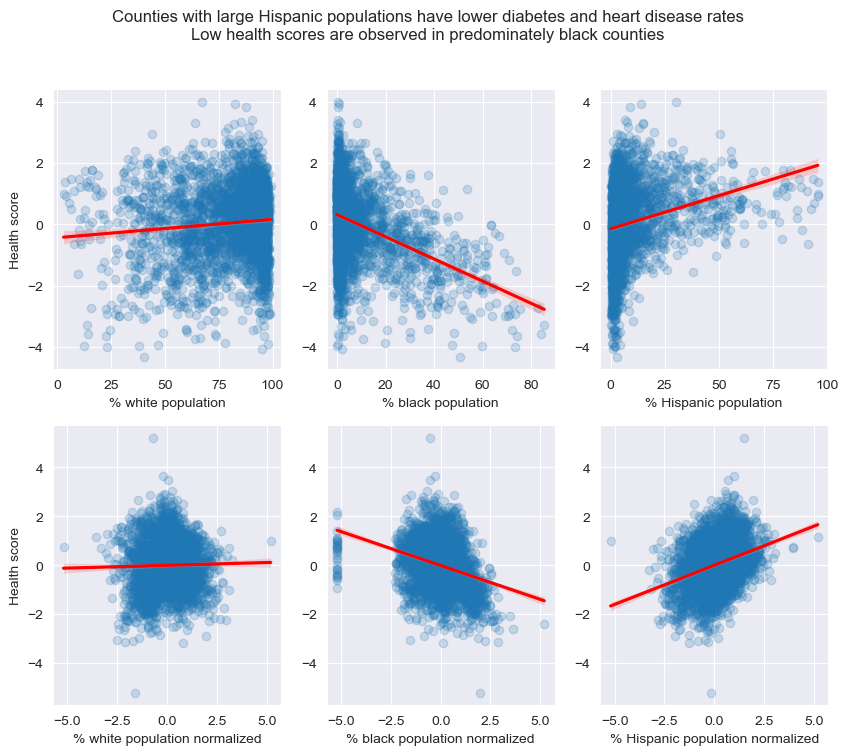

In [7]:
# Health vs race
fig, axs = plt.subplots(2,3, figsize=(10,8))
for i,(d,norm) in enumerate([(df_nn, ''), (df_qnt, ' normalized')]):
    sns.regplot(data=d, x='PCT_NHWHITE10', y='PCA', ax=axs[i,0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,0].set_ylabel('Health score')
    axs[i,0].set_xlabel(f'% white population{norm}')
    sns.regplot(data=d, x='PCT_NHBLACK10', y='PCA', ax=axs[i,1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,1].set_ylabel('')
    axs[i,1].set_xlabel(f'% black population{norm}')
    sns.regplot(data=d, x='PCT_HISP10', y='PCA', ax=axs[i,2], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,2].set_ylabel('')
    axs[i,2].set_xlabel(f'% Hispanic population{norm}')
plt.suptitle('Counties with large Hispanic populations have lower diabetes and heart disease rates\nLow health scores are observed in predominately black counties')
plt.savefig('data/figures/race vs health.png')
plt.show()

## Population Structure Analysis
Older counties may have higher diabetes rates, younger counties may have more people dying early from heart disease.
1. Plot % older than 65 vs diabetes rates
2. Plot % younger than 18 vs heart disease mortality

Counties that are predominately white, black, or Hispanic may have different age structures.
1. Plot % older than 65 vs % white/black/Hispanic
2. Plot % younger than 18 vs % white/black/Hispanic

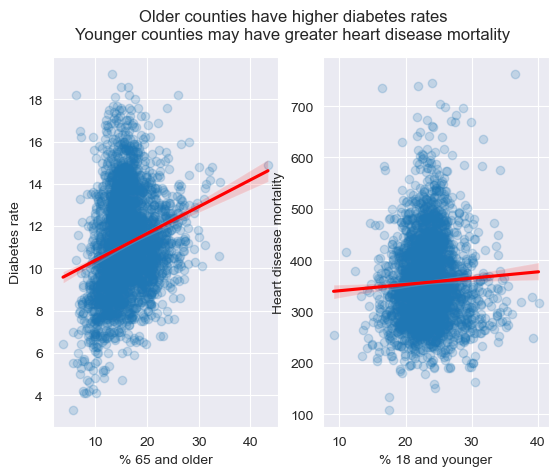

In [9]:
# age structure vs diabetes and heart disease
fig, axs = plt.subplots(1,2)
sns.regplot(df_nn, x='PCT_65OLDER10', y='PCT_DIABETES_ADULTS13', ax=axs[0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[0].set_ylabel('Diabetes rate')
axs[0].set_xlabel('% 65 and older')
sns.regplot(df_nn, x='PCT_18YOUNGER10', y='HDM', ax=axs[1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
axs[1].set_ylabel('Heart disease mortality')
axs[1].set_xlabel('% 18 and younger')
plt.suptitle('Older counties have higher diabetes rates\nYounger counties may have greater heart disease mortality')
plt.savefig('data/figures/chronic disease vs age structure.png')
plt.show()

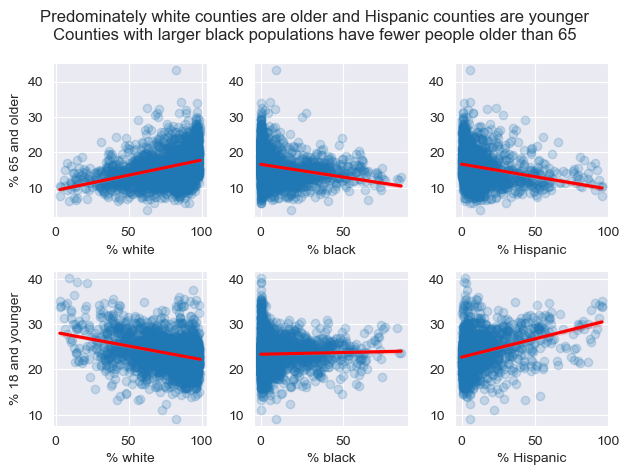

In [12]:
# age structure vs race
fig, axs = plt.subplots(2,3)
for i,(y_var, des) in enumerate([('PCT_65OLDER10', '% 65 and older'), ('PCT_18YOUNGER10', '% 18 and younger')]):
    sns.regplot(df_nn, x='PCT_NHWHITE10', y=y_var, ax=axs[i,0], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,0].set_ylabel(des)
    axs[i,0].set_xlabel('% white')
    sns.regplot(df_nn, x='PCT_NHBLACK10', y=y_var, ax=axs[i,1], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,1].set_ylabel('')
    axs[i,1].set_xlabel('% black')
    sns.regplot(df_nn, x='PCT_HISP10', y=y_var, ax=axs[i,2], scatter_kws={'alpha': 0.2}, line_kws=dict(color="r"))
    axs[i,2].set_ylabel('')
    axs[i,2].set_xlabel('% Hispanic')
plt.suptitle('Predominately white counties are older and Hispanic counties are younger\nCounties with larger black populations have fewer people older than 65')
plt.tight_layout()
plt.savefig('data/figures/age structure vs race.png')
plt.show()